# ARUCO marker creation

In [8]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

In [36]:
width = 1080
height = 1080

image_size = (height, width)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
aruco_image = np.ones(image_size, dtype=np.uint8)*255



n = 9
for i in range(0,n):
    row = i//3
    col = i%3
    img = aruco.drawMarker(aruco_dict,i+1, int(0.3*width))
    x = int((0.025*(col+1) + 0.3*col)*width)
    y = int((0.025*(row+1) + 0.3*row)*height)
    aruco_image[y:y+img.shape[0],x:x+img.shape[1]] = img
    print(x,y)

27 27
378 27
729 27
27 378
378 378
729 378
27 729
378 729
729 729


In [30]:
plt.imshow(aruco_image, cmap = mpl.cm.gray, interpolation = "nearest")

## 3: Post processing

In [64]:
print(corners[0][0])

[[ 729.  729.]
 [1052.  729.]
 [1052. 1052.]
 [ 729. 1052.]]


In [25]:
%%time
# gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(aruco_image, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(aruco_image.copy(), corners, ids)


CPU times: user 58.8 ms, sys: 33.5 ms, total: 92.4 ms
Wall time: 13.2 ms


Pretty fast processing !

## 4: Results

In [66]:
corners[0][0]

array([[ 729.,  729.],
       [1052.,  729.],
       [1052., 1052.],
       [ 729., 1052.]], dtype=float32)

In [69]:
np.vstack([corners[1][0], corners[0][0]])

array([[ 378.,  729.],
       [ 701.,  729.],
       [ 701., 1052.],
       [ 378., 1052.],
       [ 729.,  729.],
       [1052.,  729.],
       [1052., 1052.],
       [ 729., 1052.]], dtype=float32)

In [56]:
ids[2][0]

7

In [40]:
print(corners[1])

[[[ 378.  729.]
  [ 701.  729.]
  [ 701. 1052.]
  [ 378. 1052.]]]


<IPython.core.display.Javascript object>


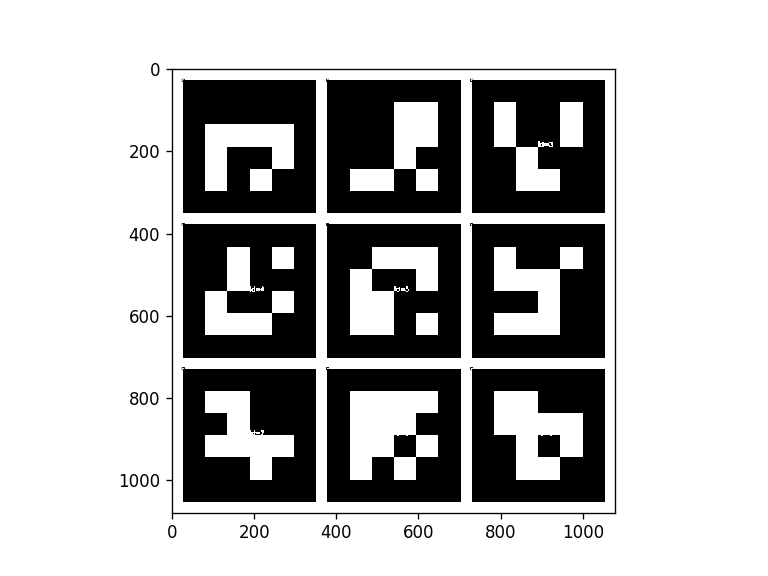

In [34]:
plt.figure()
plt.imshow(frame_markers, cmap = mpl.cm.gray, interpolation = "nearest")

<IPython.core.display.Javascript object>


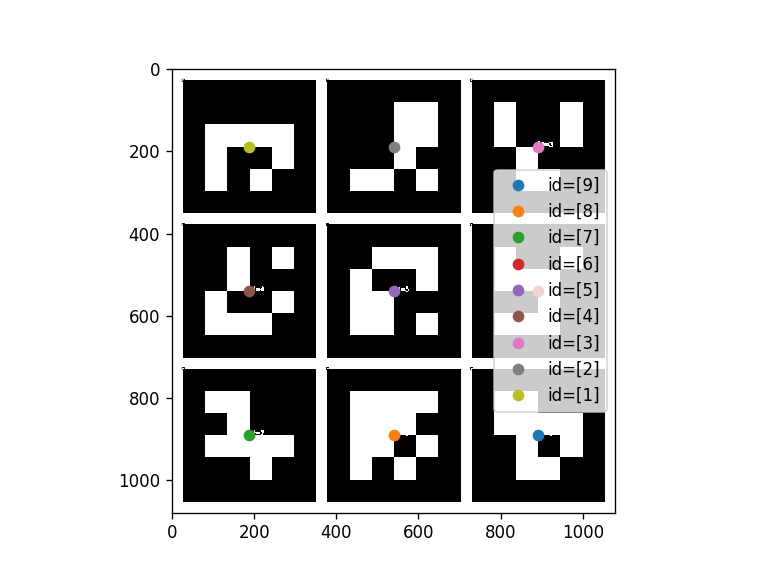

In [26]:
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

In [10]:
def quad_area(data):
    l = data.shape[0]//2
    corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
    c1 = corners[:, :, 0]
    c2 = corners[:, :, 1]
    c3 = corners[:, :, 2]
    c4 = corners[:, :, 3]
    e1 = c2-c1
    e2 = c3-c2
    e3 = c4-c3
    e4 = c1-c4
    a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
    return a

corners2 = np.array([c[0] for c in corners])

data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                   index = pd.MultiIndex.from_product( 
                           [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]], 
                       names = ["marker", ""] ))

data = data.unstack().swaplevel(0, 1, axis = 1).stack()
data["m1"] = data[["c1", "c2"]].mean(axis = 1)
data["m2"] = data[["c2", "c3"]].mean(axis = 1)
data["m3"] = data[["c3", "c4"]].mean(axis = 1)
data["m4"] = data[["c4", "c1"]].mean(axis = 1)
data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
data

c1     c2     c3     c4     m1     m2     m3     m4      o
marker                                                                 
1      x   80.0  187.0  187.0   80.0  133.5  187.0  133.5   80.0  133.5
       y   58.0   58.0  165.0  165.0   58.0  111.5  165.0  111.5  111.5
2      x  209.0  316.0  316.0  209.0  262.5  316.0  262.5  209.0  262.5
       y   58.0   58.0  165.0  165.0   58.0  111.5  165.0  111.5  111.5
3      x  339.0  446.0  446.0  339.0  392.5  446.0  392.5  339.0  392.5
       y   58.0   58.0  165.0  165.0   58.0  111.5  165.0  111.5  111.5
4      x  468.0  575.0  575.0  468.0  521.5  575.0  521.5  468.0  521.5
       y   58.0   58.0  165.0  165.0   58.0  111.5  165.0  111.5  111.5
5      x   80.0  187.0  187.0   80.0  133.5  187.0  133.5   80.0  133.5
       y  188.0  188.0  295.0  295.0  188.0  241.5  295.0  241.5  241.5
6      x  209.0  316.0  316.0  209.0  262.5  316.0  262.5  209.0  262.5
       y  188.0  188.0  295.0  295.0  188.0  241.5  295.0  241.5  241.5
7      x  339.0  446.0  446.0  339.0  392.5  446.0  392.5  339.0  392.5
       y  188.0  188.0  295.0  295.0  188.0  241.5  295.0  241.5  241.5
8      x  468.0  575.0  575.0  468.0  521.5  575.0  521.5  468.0  521.5
       y  188.0  188.0  295.0  295.0  188.0  241.5  295.0  241.5  241.5
9      x   80.0  187.0  187.0   80.0  133.5  187.0  133.5   80.0  133.5
       y  319.0  319.0  426.0  426.0  319.0  372.5  426.0  372.5  372.5
10     x  209.0  316.0  316.0  209.0  262.5  316.0  262.5  209.0  262.5
       y  319.0  319.0  426.0  426.0  319.0  372.5  426.0  372.5  372.5
11     x  339.0  446.0  446.0  339.0  392.5  446.0  392.5  339.0  392.5
       y  319.0  319.0  426.0  426.0  319.0  372.5  426.0  372.5  372.5
12     x  468.0  575.0  575.0  468.0  521.5  575.0  521.5  468.0  521.5
       y  319.0  319.0  426.0  426.0  319.0  372.5  426.0  372.5  372.5